In [1]:
import numpy as np

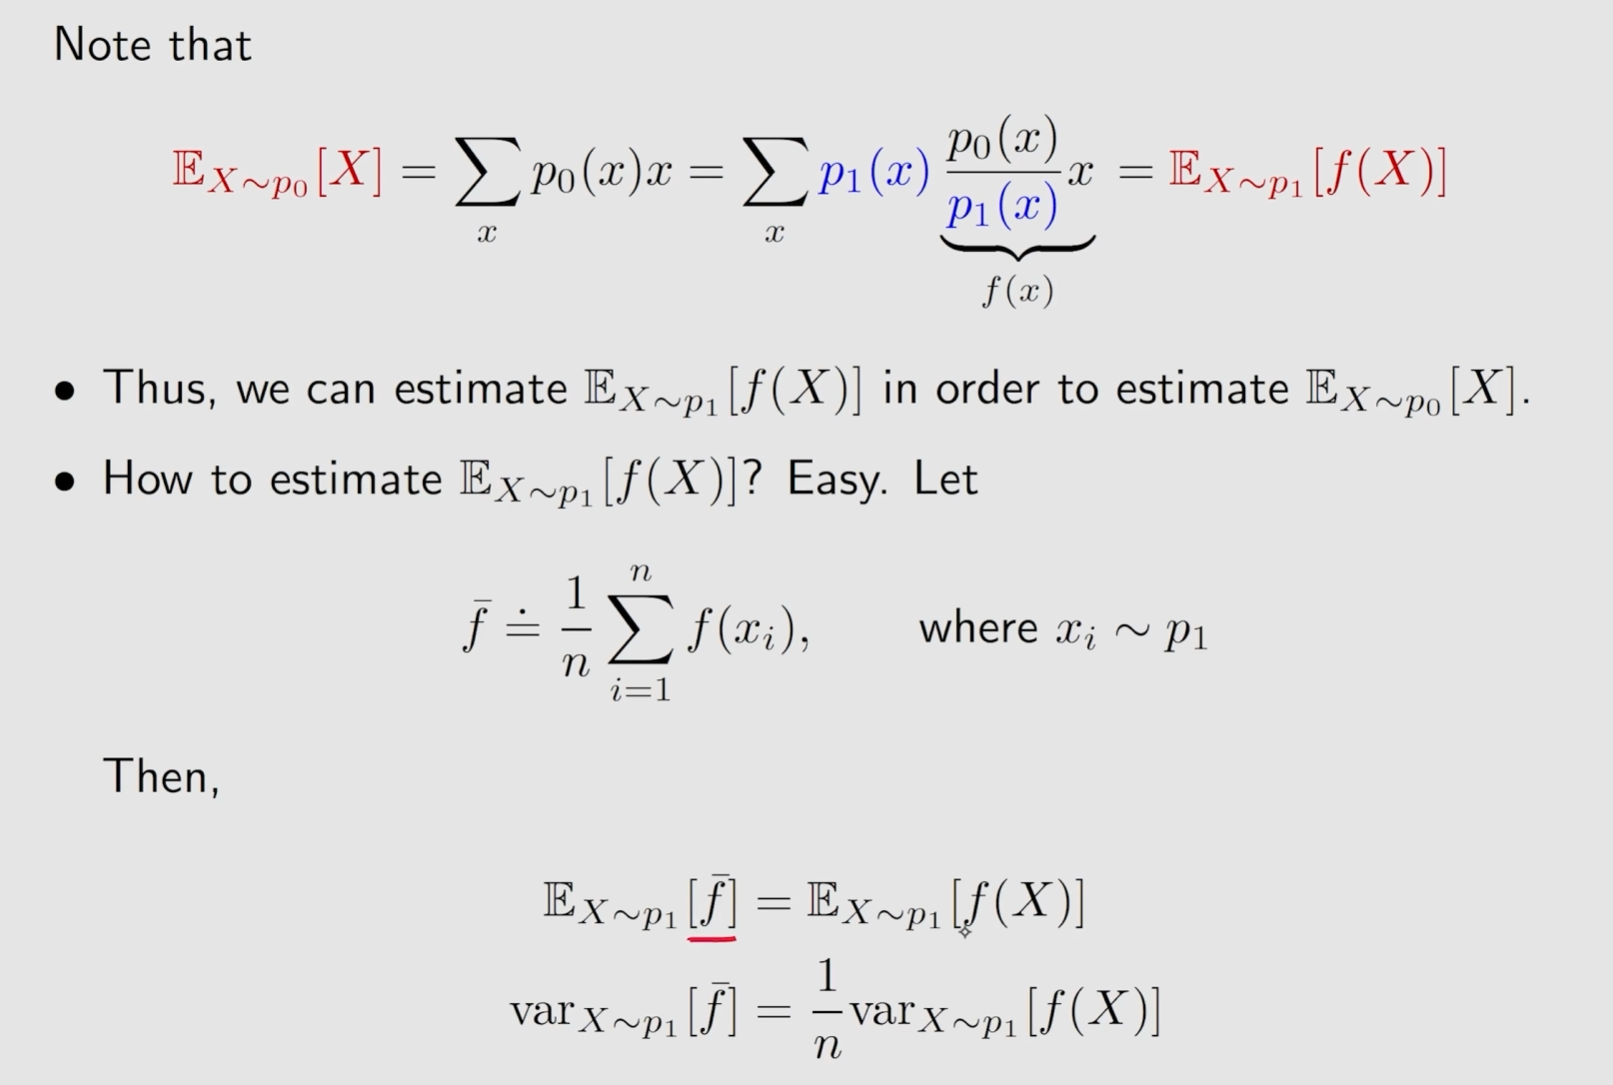

In [31]:
value = [-1, 1]
p0 = [0.2, 0.8]
p1 = [0.5, 0.5]
# 0.6
E_p0 = -1 * p0[0] + 1 * p0[1]
# 0.0
E_p1 = -1 * p1[0] + 1 * p1[1]

def fx(p0, p1, xi):
    idx = 0 if xi == -1 else 1
    return p0[idx] * xi / p1[idx]

n = 100000
X = np.random.choice(a=value, p=p1, size=(n, ))

f_xi = np.asarray([fx(p0, p1, xi) for xi in X])
f_bar = f_xi.mean()
print(f_bar)

0.6029799999999997


# Off Policy 


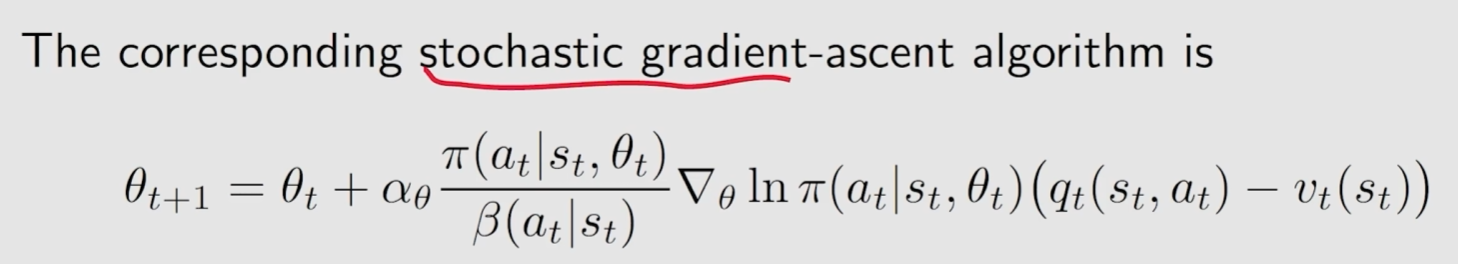

### 先看advantage function部分的(q - v)  
- policy就是在state下做出action的概率。
- q是在s状态下做了一个动作之后，继续根据policy pi得到的return期望  
- v是在s状态下无论做什么动作，继续根据policy pi得到的return期望  
把policy pi 比作好班级， v是好班级的平均得分，根据这个pi做出的action得到的q是好班级一个人的平均得分，这个人的动作好不好是和好班级平均得分作比较，比平均更好，就增大这个action的概率。  
### 再看importance sampling部分  
- beta比作差班级。  
差班级和好班级做同一件事情，好班级在某个state做出的action的概率肯定和差班级不一样，导致得到的分数期望肯定不一样。  
那么在某个state做出某个action，即state-action pair，好班级和差班级在这个state做出这个action概率做一个比较，看看差了多少。   
但是算法是off policy的，差班级不会更新，那么就根据差班级和好班级概率p(s,a)的差距做出一个适应器，差班级每在state做出action的概率经过适应器的转换后能够更接近好班级的概率。    
比较后如果发现，好班级几乎不可能在这个state做出这个action，而差班级却有很大可能，那么适应器就大幅减少差班级做出这个action的倾向。 
### 公式的直观解释  
好班级是动态进步的，好班级会根据更优秀的动作来更新这个动作的概率。  
通常是让好班级做出aciton的概率，再根据相对分数期望，更新参数来优化好班级的action概率。  
但是现在是off policy的，有一个差班级，只能差班级做出action，通过差班级做出action的概率经过适应器逼近好班级的概率来更新参数，进而优化好班级的action概率。  
- 为什么不直接用好班级做出action来优化好班级的actio概率呢，非要间接性通过差班级来优化好班级action概率吗？(问题同为什么不用on policy?)  
因为好班级是动态更新的，上一状态做出的acton只能优化上一状态的policy。  
要想优化这个状态的policy，就需要这个状态重新生成一个新的aciton来评估好坏，进而优化这个状态的policy。  
而这种做法很费时费力。